In [1]:
from coronavirus_analyzer import CoronavirusAnalyzer
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
last_date = '2020-02-22'
sample_cnt = 14
analyzer = CoronavirusAnalyzer(last_date, first_date='2020-01-17', sample_cnt=sample_cnt)

2020-02-24 08:51:38,252 - numexpr.utils - INFO - NumExpr defaulting to 4 threads.


In [3]:
# for n in range(1, 11):
#     df = analyzer.get_df_move_inc_corr(n=n).iloc[:, 0::3]
#     print(n, df.mean().mean())

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


corr: 0.8457078449979715


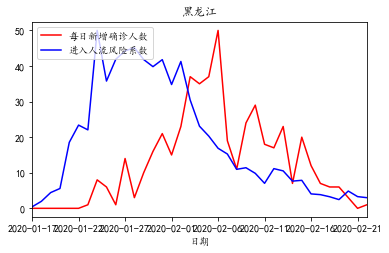

In [4]:
analyzer.plot_move_inc_corr('黑龙江', '2020-02-22', n=3, shift=0, window=1, sample_cnt=14)

corr: 0.7259023397120583


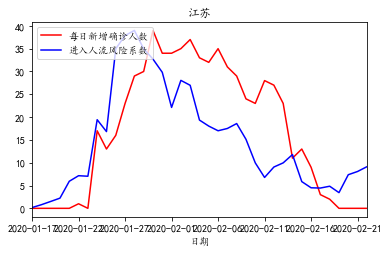

In [5]:
analyzer.plot_move_inc_corr('江苏', '2020-02-22', n=3, shift=0, window=1)

corr: 0.15905655971618005


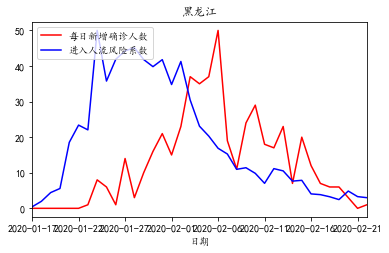

In [6]:
analyzer.plot_move_inc_corr('黑龙江', '2020-02-18')  # , n=3, shift=4, window=10

corr: 0.7225296092609151


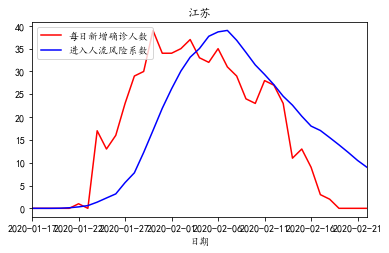

In [7]:
analyzer.plot_move_inc_corr('江苏', '2020-02-18')  # , n=3, shift=0, window=9

In [8]:
df = analyzer.df_move_inc_corr
data = []
for region in df.columns.levels[0]:
    df_region = df[region]
    shift_mean = df_region['shift'].mean()
    window_mean = df_region['window'].mean()
    data.append({'地区': region, 'shift均值': shift_mean, 'window均值': window_mean, '总均值': shift_mean + window_mean})
df_mean = pd.DataFrame(data).sort_values(['总均值', 'shift均值', 'window均值'])
df_mean = df_mean.set_index('地区')
df_mean = df_mean.T
df_mean

地区,西藏,云南,武汉,青海,重庆,福建,辽宁,上海,北京,浙江,天津,内蒙古,甘肃,吉林,湖南,广西,陕西,广东,江苏,海南,四川,山西,山东,宁夏,河南,贵州,新疆,黑龙江,河北,安徽,江西,湖北
shift均值,1.571429,1.09375,1.361111,1.461538,2.393939,1.5625,2.7500,2.696970,2.787879,2.000000,4.303030,3.633333,3.800000,4.133333,3.71875,3.43750,3.966667,2.121212,2.21875,3.87500,3.060606,4.09375,4.151515,4.0000,5.242424,5.40625,5.200000,4.612903,6.03125,4.1875,5.0625,6.757576
window均值,1.285714,1.90625,1.750000,2.000000,1.303030,2.3125,1.6875,2.393939,2.363636,3.242424,1.454545,2.633333,2.566667,2.266667,2.93750,3.28125,2.866667,4.787879,4.84375,3.84375,4.818182,3.87500,4.030303,4.1875,3.454545,3.53125,3.933333,4.612903,4.31250,6.2500,5.9375,4.848485
总均值,2.857143,3.00000,3.111111,3.461538,3.696970,3.8750,4.4375,5.090909,5.151515,5.242424,5.757576,6.266667,6.366667,6.400000,6.65625,6.71875,6.833333,6.909091,7.06250,7.71875,7.878788,7.96875,8.181818,8.1875,8.696970,8.93750,9.133333,9.225806,10.34375,10.4375,11.0000,11.606061


In [9]:
df[df_mean.columns].tail()

西藏                     云南                     武汉               \
           corr shift window      corr shift window      corr shift window   
2020-02-18  NaN   NaN    NaN  0.640168   0.0    1.0  0.474948   0.0    1.0   
2020-02-19  NaN   NaN    NaN  0.674136   0.0    1.0  0.494320   0.0    1.0   
2020-02-20  NaN   NaN    NaN  0.675527   0.0    1.0  0.519850   0.0    1.0   
2020-02-21  NaN   NaN    NaN  0.708088   0.0    1.0  0.539793   0.0    1.0   
2020-02-22  NaN   NaN    NaN  0.762323   0.0    1.0  0.550982   0.0    1.0   

                  青海                     重庆                     福建        \
                corr shift window      corr shift window      corr shift   
2020-02-18  0.751044   2.0    1.0  0.061910   0.0    1.0  0.929197   7.0   
2020-02-19       NaN   NaN    NaN  0.150052   0.0    1.0  0.934102   7.0   
2020-02-20       NaN   NaN    NaN  0.197202   0.0    1.0  0.972617   2.0   
2020-02-21       NaN   NaN    NaN  0.254872   0.0    1.0  0.954154   2.0   
2020-02-22       NaN   NaN    NaN  0.341562   0.0    1.0  0.935628   2.0   

                         辽宁                     上海                     北京  \
           window      corr shift window      corr shift window      corr   
2020-02-18    3.0  0.777547   8.0    4.0  0.768769   3.0    4.0  0.902067   
2020-02-19    3.0  0.853219   5.0    1.0  0.807461   4.0    5.0  0.888985   
2020-02-20    6.0  0.848057   5.0    1.0  0.866478   5.0    1.0  0.826141   
2020-02-21    8.0  0.849036   8.0    2.0  0.837519   5.0    1.0  0.831136   
2020-02-22    8.0  0.840172   8.0    2.0  0.838225   4.0    2.0  0.837427   

                               浙江                     天津               \
           shift window      corr shift window      corr shift window   
2020-02-18   2.0    3.0  0.966728   1.0   10.0  0.611274   6.0    3.0   
2020-02-19   2.0    3.0  0.955582   1.0   10.0  0.656248   6.0    3.0   
2020-02-20   2.0    8.0  0.859178   6.0    3.0  0.751226   6.0    3.0   
2020-02-21   8.0    2.0  0.753198   6.0    3.0  0.788202   6.0    3.0   
2020-02-22   8.0    2.0  0.642977   6.0    3.0  0.820328   6.0    3.0   

                 内蒙古                     甘肃                     吉林        \
                corr shift window      corr shift window      corr shift   
2020-02-18  0.650968   2.0    1.0  0.860395   6.0    1.0  0.934510   6.0   
2020-02-19  0.600619   2.0    1.0  0.855236   6.0    1.0  0.927925   6.0   
2020-02-20  0.591501   2.0    1.0  0.833236   1.0    8.0  0.911481   6.0   
2020-02-21  0.676937   2.0    1.0  0.859043   1.0    7.0  0.907710   6.0   
2020-02-22  0.700443   1.0    4.0  0.768542   1.0    8.0  0.797736   0.0   

                         湖南                     广西                     陕西  \
           window      corr shift window      corr shift window      corr   
2020-02-18    1.0 -0.067685   0.0    1.0  0.709094   0.0   10.0  0.750148   
2020-02-19    1.0  0.050303   0.0    1.0  0.726595   7.0    2.0  0.722623   
2020-02-20    1.0  0.190795   0.0    1.0  0.822597   7.0    1.0  0.658503   
2020-02-21    1.0  0.269975   0.0    1.0  0.802950   7.0    1.0  0.669461   
2020-02-22    2.0  0.342156   0.0    1.0  0.762823   7.0    1.0  0.716945   

                               广东                     江苏               \
           shift window      corr shift window      corr shift window   
2020-02-18   6.0    7.0  0.924393   0.0   10.0  0.930221   3.0   10.0   
2020-02-19   6.0    8.0  0.885703   1.0   10.0  0.940906   3.0    7.0   
2020-02-20   9.0    5.0  0.847349   0.0   10.0  0.947719   5.0   10.0   
2020-02-21  10.0    4.0  0.834940   0.0    3.0  0.956840   8.0    8.0   
2020-02-22  10.0    7.0  0.882898   7.0   10.0  0.962367   7.0   10.0   

                  海南                     四川                     山西        \
                corr shift window      corr shift window      corr shift   
2020-02-18  0.885078   4.0    9.0  0.838238   9.0    5.0  0.889840   6.0   
2020-02-19  0.820836   4.0    1.0  0.855392   9.0    2.0  0.788468  

In [10]:
df[df_mean.columns].to_excel('人流和新增相关性分析 {}.xlsx'.format(last_date))